# Princípios de Comunicação
## Atividade Computacional 1 - Modulação AM

Esta atividade irá explorar os conceitos da modulação em amplitude (AM). Será apresentada uma simulação do processo de modulação AM-DSB-SC e da demodulação síncrona como exemplo. A atividade computacional consistirá na simulação da modulação AM-DSB e por detecção de envoltória.

Serão utilizadas algumas bibliotecas do python, de forma a facilidar cada etapa.

Bibliotecas:

*   librosa - Manipulação de arquivos de áudio
*   numpy - Obtenção da Transformada Discreta de Fourier usando o algoritmo FFT
*   scipy - Filtragem de sinais com filtros do tipo butterworth
*   matplotlib - Gráficos


In [1]:
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# **Atividade**

Na demonstração que foi apresentada, as mensagens foram moduladas utilizando o processo de modulação AM-DSB-SC, ou seja, modulação em amplitude com portadora suprimida. Neste tipo de modulação, a portadora não é transmitida junto da mensagem modulada, e uma das consequências é não ser possível utilizar um circuito detector de envoltória. Para podermos utilizar um detector de envoltória, a modulação usada é a AM-DSB, na qual transmitimos junto à mensagem uma cópia da portadora. Essa modulação é representada pela equação

$$\Phi_{AM-DSB}(t)=[A+m(t)]cos(\omega_c t).$$

A constante $A$ define a amplitude da portadora e deve ser escolhida de forma a garantir que toda a porção negativa da mensagem seja deslocada e se torne positiva, fazendo com que a envoltória do sinal modulado seja a mensagem.

Se quisermos realizar a demodulação por detecção de envoltória, o primeiro passo consiste em utilizar o filtro passa-faixas, de forma a extrair do canal a porção do espectro associada à menságem que queremos demodular. Em seguida, podemos aplicar o detector de envoltória, o qual é composto por retificador do sinal, filtro passa-baixas e bloqueador de valor DC.

Nesta atividade o objetivo é desenvolver a simulação do processo de modulalção AM-DSB e o processo de demodulação por detecção de envoltória, vizualizando os passos necessários. Dessa forma, desenvolva as seguintes tarefas:

1.   Simule o processo de modulação AM-DSB utilizando dois sinais de áudio, modulados com duas portadoras distintas, escolhendo um fator de modulação adequado para detecção de envoltória;
2.   Mostre os espectros de cada etapa do processo de modulação, discutindo o objetivo de cada etapa;
3.   Simule o processo de demodulação por detecção de envoltória, aplicando o filtro passa-faixas, retificador, filtro passa-baixas e bloqueador de valor DC;
4.   Mostre os espectros de cada etapa do processo de demodulação, discutindo o objetivo de cada etapa;







In [2]:
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 1. Simulação de processo de modulação AM-DSB com dois áudios.


## 1.1.1. Escolha de dois sinais de áudios utilizando a biblioteca Librosa.

In [3]:
# Endereços dos arquivos de áudio
fishin = librosa.ex("fishin")
pistachio = librosa.ex("pistachio")

# Leitura do arquivo como um array numpy considerando a taxa de amostragem original do arquivo
array_audio1, taxa_amostragem_1 = librosa.load(fishin, sr=None)
array_audio2, taxa_amostragem_2 = librosa.load(pistachio, sr=None)

# Retirando um trecho de 5 segundos dos áudios
amostras_5s = 5 * taxa_amostragem_1
array_audio1_cortado=array_audio1[0:amostras_5s]

amostras_5s = 5 * taxa_amostragem_2
array_audio2_cortado=array_audio2[0:amostras_5s]

In [4]:
Audio(data=array_audio1_cortado, rate=taxa_amostragem_1)

In [5]:
Audio(data=array_audio2_cortado, rate=taxa_amostragem_2)

In [6]:
# Definindo a frequência de amostragem para simular a trasmissão como se tivessemos usando um sistema contínuo
freq_superamostragem = 1e6
freq_subamostragem = 1e4

array_audio_1_subamostrado = librosa.resample(array_audio1_cortado, orig_sr=taxa_amostragem_1, target_sr=freq_subamostragem)
# Reamostrando o áudio para a frequência mais alta
array_audio_1_superamostrado = librosa.resample(array_audio_1_subamostrado, orig_sr=freq_subamostragem, target_sr=freq_superamostragem)

array_audio_2_subamostrado = librosa.resample(array_audio2_cortado, orig_sr=taxa_amostragem_2, target_sr=freq_subamostragem)
# Reamostrando o áudio para a frequência mais alta
array_audio_2_superamostrado = librosa.resample(array_audio_2_subamostrado, orig_sr=freq_subamostragem, target_sr=freq_superamostragem)

### 1.1.2. Gráfico do sinal de áudio 1 e 2

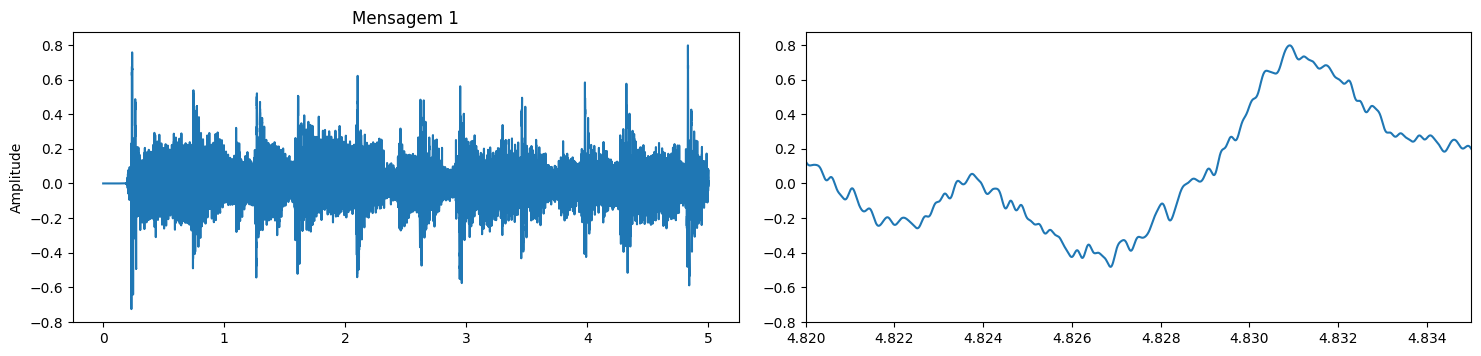

In [7]:
eixo_t=np.linspace(0, 5, len(array_audio_1_superamostrado))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,array_audio_1_superamostrado)
plt.ylabel('Amplitude')
plt.title('Mensagem 1')
plt.subplot(3,2,2)
plt.plot(eixo_t,array_audio_1_superamostrado)
plt.xlim(4.82, 4.835)
plt.tight_layout()

**Pode ser percebido que o primeiro sinal de áudiovaria de -0.8 a +0.8 ao longo do tempo. Isso nos dá dica de quanto será mais ou menos o fator de modulação para esse sinal**

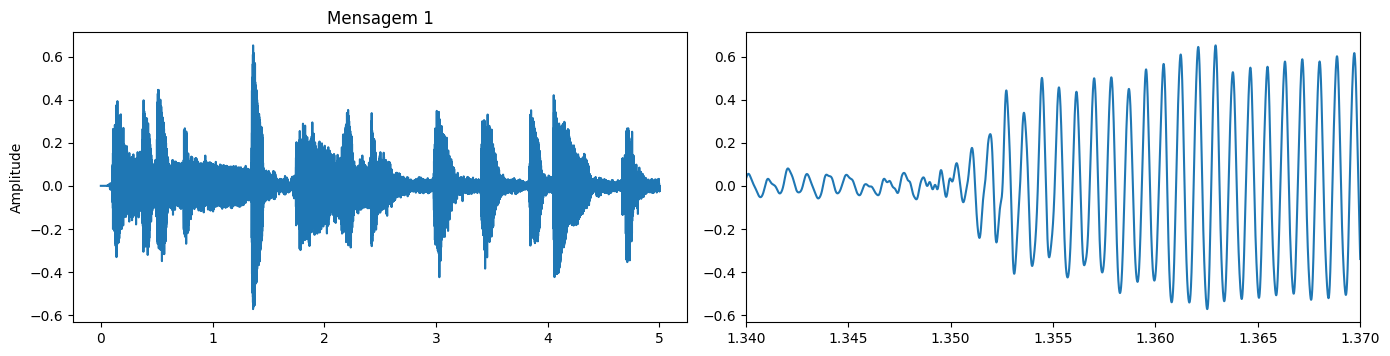

In [8]:
eixo_t=np.linspace(0, 5, len(array_audio_2_superamostrado))
# Plotando o sinal de áudio
plt.figure(figsize = (14, 10))
plt.subplot(3,2,1)
plt.plot(eixo_t,array_audio_2_superamostrado)
plt.ylabel('Amplitude')
plt.title('Mensagem 1')

plt.subplot(3,2,2)
plt.plot(eixo_t,array_audio_2_superamostrado)
plt.xlim(1.34,1.37)
plt.tight_layout()

**Já no segundo sinal de áudio, pode ser percebido ele varia de -0.6 a +0.6 ao longo do tempo. Novamente, isso nos dá dica de quanto será mais ou menos o fator de modulação para esse sinal**

## 1.2.1 Escolha de dois portadores com frequência diferente.
A primeira portadora terá a frequência fundamental de 1 Hz enquanto que a segunda terá 10 Hz, essas duas portadoras com frequências fundamentais distintas possibilitará o envio de duas mensagens utilizando um canal.

In [9]:
# Frequência da portadora da rádio 1 [Hz]
fc1 = 5e4

# Criando a portadora 1
eixo_t=np.linspace(0, 5, len(array_audio_1_superamostrado))
portadora_1=np.zeros([len(array_audio_1_superamostrado)])
for i in range(0,len(array_audio_1_superamostrado)):
    portadora_1[i]=np.cos(2*np.pi*fc1*eixo_t[i])

# Frequência da portadora da rádio 5 [Hz]
fc2 = 5 *fc1

# Criando a portadora 2
eixo_t=np.linspace(0, 5, len(array_audio_2_superamostrado))
portadora_2=np.zeros([len(array_audio_2_superamostrado)])
for i in range(0,len(array_audio_2_superamostrado)):
    portadora_2[i]=np.cos(2*np.pi*fc2*eixo_t[i])

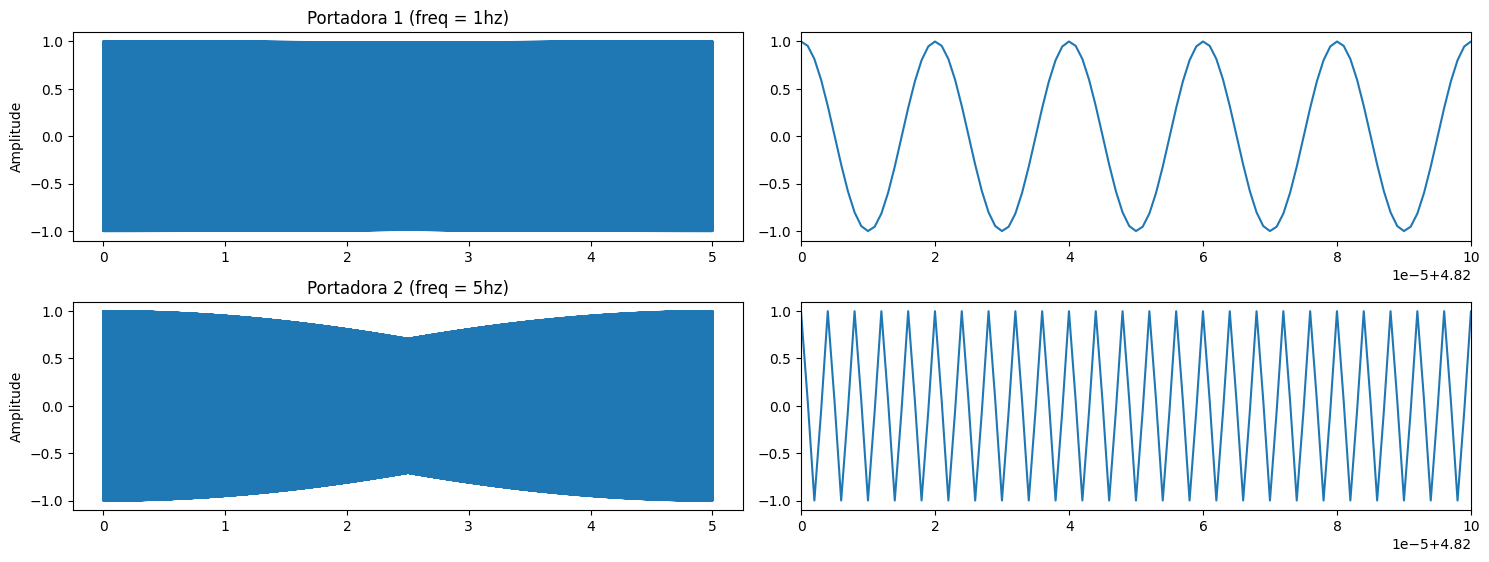

In [10]:
eixo_t=np.linspace(0, 5, len(array_audio_1_superamostrado))
# Plotando o sinal de áudio
plt.figure(figsize = (15, 8))
plt.subplot(3,2,1)
plt.plot(eixo_t,portadora_1)
plt.ylabel('Amplitude')
plt.title('Portadora 1 (freq = 1hz)')
plt.subplot(3,2,2)
plt.plot(eixo_t,portadora_1)
plt.xlim(4.82, 4.8201)

# Plotando o sinal de áudio
plt.subplot(3,2,3)
plt.plot(eixo_t,portadora_2)
plt.ylabel('Amplitude')
plt.title('Portadora 2 (freq = 5hz)')
plt.subplot(3,2,4)
plt.plot(eixo_t,portadora_2)
plt.xlim(4.82, 4.8201)
plt.tight_layout()

## 1.3.1 Fator de modulação
O fator de modulação, é definido como:

$$ \mu = \frac{A_m}{A_c}$$

onde,


*   $A_m$ é a amplitude do sinal modulador  
*   $A_c$ é a amplitude da portadora  

Para a detecção por envoltória funcionar corretamente,o fator de modulação deve estar no intervalo $ 0 < m \le 1$.



*   Se $ m > 1$ não é possível fazer demodulação por detecção de envoltório
*   Se $ m \le 1$ é possível realizar demodulação, no entanto quando menor $m$ mais potencia será utilizada.

No entanto, há um forma mais fácil de encontrar computacionalmente o fator de de modulação. Apenas utilizando:

```python
  min(sinal)
```

Assim sabemos o minimo de valor $A$ para que o sinal fique todo acima acima do eixo positivo da abscissa.



In [11]:
print(f"O valor minimo que o sinal de áudio 1 assume é {min(array_audio_1_superamostrado)}\n")
print(f"O valor minimo que o sinal de áudio 2 assume é {min(array_audio_2_superamostrado)}\n")


O valor minimo que o sinal de áudio 1 assume é -0.7259854078292847

O valor minimo que o sinal de áudio 2 assume é -0.5719702243804932



Note que os valores está bem próximo ao esperado e relatado na seção 1.1.2.

Portanto os valores adotados para os coeficientes de modulação será ligeiramente maior que os valores minímos, pois assim garatimos que todo o sinal está acima do eixo negativo. Ou seja, para a mensagem 1 o A1 será 0.73 enquanto que para a mensagem 2 será A2 = 0.58

# 2. Espectro de cada etapa da modulação.

A modulação consiste em multiplicar o sinal de mensagem por um cosseno de frequência elevada, chamado de portadora. Esse processo desloca o espectro do sinal original para regiões em torno da frequência da portadora, permitindo que a informação seja transmitida em bandas de frequência específicas, adequadas para propagação e separação de canais.

Dessa forma, nesta seção, o objetivo é plotar o espectro das duas portadoras, definidas em  1.2.1, dos sinais de áudio e do sinal resultante após a modulação.

## 2.1. Espectro das portadoras



In [12]:
# Calcular FFT
fft_portadora_1 = np.fft.fft(portadora_1)
fft_portadora_2 = np.fft.fft(portadora_2)


In [15]:

N = len(fft_portadora_1)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_portadora_1 = n / T


In [16]:
N = len(fft_portadora_2)
n = np.arange(N)
T = N/freq_superamostragem
array_freq_portadora_2 = n / T

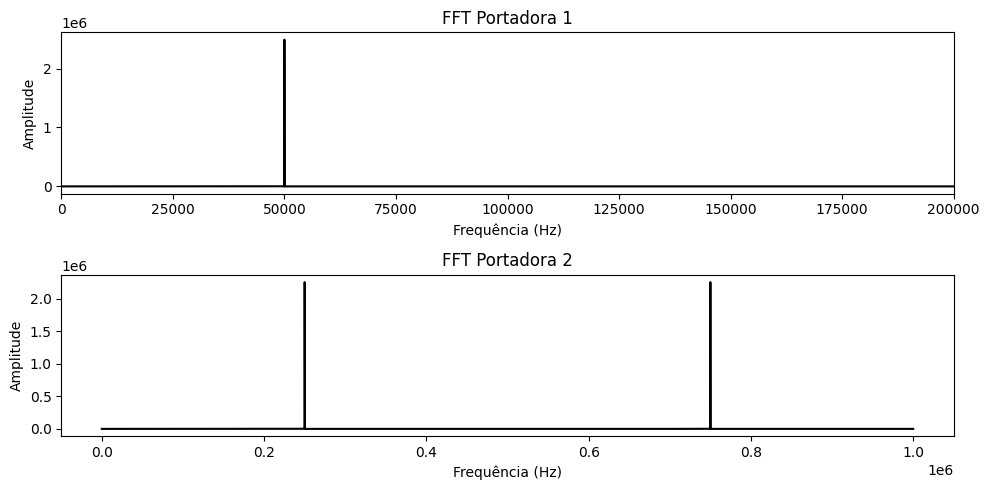

In [26]:
# Plot espectral da Mensagem 1
plt.figure(figsize=(10, 5))

# Definir o limite máximo para o eixo x
max_freq = freq_superamostragem / 5

plt.subplot(2, 1, 1)
plt.plot(array_freq_portadora_1, np.abs(fft_portadora_1), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, max_freq)
plt.title('FFT Portadora 1')


plt.subplot(2, 1, 2)
plt.plot(array_freq_portadora_2, np.abs(fft_portadora_2), 'k')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Portadora 2')


plt.tight_layout()
plt.show()